# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [171]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
display(data.describe())

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [172]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:
Variance distance metric indices: [34, 85, 181]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1502,1979,2262,425,483,395
1,16117,46197,92780,1026,40827,2944
2,112151,29627,18148,16745,4948,8550


Euclidean distance metric indices: [47, 85, 183]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,16117,46197,92780,1026,40827,2944
2,36847,43950,20170,36534,239,47943


Max variance plot


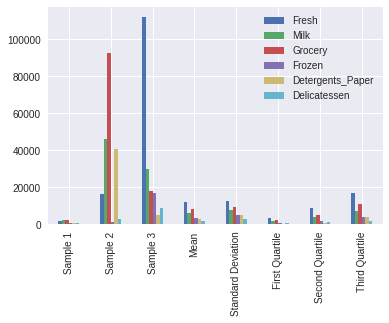

Max distance plot


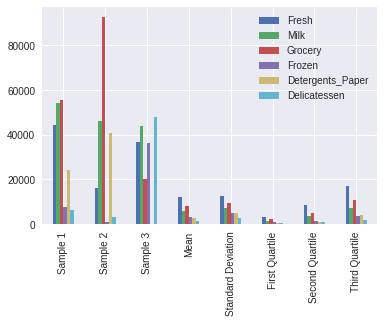

In [173]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import math, operator

#Function to find the maximum of any given dataset using a memoized format
#Applies a map to the cartesian product of an input list then reduces the final list using a given
#map and reduce function.
#Self-iterative-memoized-map-reduce
def simmr(df, k, length_func, extraction_func, map_func, reduce_func):
    # Dynamic programming ftw
    memo = dict()
    current_set = [0] * k
    length = length_func(df)
    iterations = math.factorial(length)/(math.factorial(k) * math.factorial(length - k))
    #diagnostic_percent = 0.0
    #diagnostic_granularity = 0.005
    # Run through all the possible combination
    for i in range(iterations):
       #Diagnostic % complete status
        #if float(i)/float(iterations) > diagnostic_percent:
          # print "{0}% complete".format(diagnostic_percent * 100)
           #diagnostic_percent += diagnostic_granularity
        #Iterate  
        for j in range(k):
            current_set[j] += 1
            if current_set[j] == length:
                current_set[j] = 0
                continue
            break
        #Translate the item into a sorted tuple for memoization purposes
        #If memoized already skip the computation
        selected = tuple(sorted(current_set))
        if selected in memo:
            continue
        #Compute
        else:
            data = extraction_func(df, selected)
            memo[selected] = map_func(data)
    #After computing over the space get the maximum value of the dict
    return reduce_func(memo)

##Computes the total variance across all the columns
#def sample_variance(data):
    #arr = data.as_matrix()
    #sum = 0
    #for i in range(arr.shape[1]):
        #sum += np.var(arr[:,i])
    #return sum
    
#def sample_euclidean_dist(data):
    #arr = data.as_matrix()
    #sum = 0
    #vec_sqr = np.vectorize(lambda x: math.pow(x, 2))
    #for i in range(arr.shape[1]):
        #sum += math.sqrt(np.sum(vec_sqr(arr[:,i])))
    #return sum
    
#Gets the max value in a list and outputs its key
#def sample_max_dict(dictionary):
    #return max(dictionary.iteritems(), key = operator.itemgetter(1))[0]
    
#Extracts the rows of the input data
#def sample_get_rows(data, selected):
    #return data.ix[list(selected)]
    
#Get the length of the data
#def sample_get_length(data):
    #return data.shape[0]
#indices = list(simmr(data, 3, sample_get_length, sample_get_rows, sample_get_variance, sample_max_dict))
#indices_euclidean = list(simmr(data, 3, sample_get_length, sample_get_rows, sample_euclidean_dist, sample_max_dict))
indices_euclidean = [47, 85, 183] #Indices with maximal euclidean distance in the dataset, precomputed
indices = [34, 85, 181] #Indices with maximal variance in the dataset, precomputed

# Create a DataFrame of the chosen samples
samples_euclidean = pd.DataFrame(data.loc[indices_euclidean], columns = data.keys()).reset_index(drop = True)
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"

#Note: The variance distance metric will be the samples used for calculation and analysis
print "Variance distance metric indices: {0}".format(indices)
display(samples)
print "Euclidean distance metric indices: {0}".format(indices_euclidean)
display(samples_euclidean)

#Contrasting statistical aspects of data with sample points via plots for visualization
compare_plot_labels = ["Sample 1", "Sample 2", "Sample 3", "Mean", "Standard Deviation",
                        "First Quartile", "Second Quartile", "Third Quartile"]
compare_sample_frame = pd.concat([samples.copy(),data.describe().ix[1:3,:],
                                 data.describe().ix[4:7,:]], axis=0)
compare_sample_frame.plot(kind="bar")
plt.xticks(range(8), compare_plot_labels)
print "Max variance plot"
plt.show()
compare_euclidean_sample_frame = pd.concat([samples_euclidean.copy(), data.describe().ix[1:3,:],
                                           data.describe().ix[4:7,:]])
compare_euclidean_sample_frame.plot(kind="bar")
plt.xticks(range(8), compare_plot_labels)
print "Max distance plot"
plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Two metrics were used to establish which was the superior 'measure' of establishing customer archetypes. Maximal variance seems to have chosen the most visually diffent sample set, so it is prioritized as the primary sample set. 

Considering the concern with maximal variance. The algorithm was concerned with finding three points that are the most distinct from one another. The only sample thats similar in scale to the main metrics is the first sample. The remaining two are nearly maximal in the features that they dominate. 

The first sample due to the small nature of the purchases made seems to an establishment who would be smaller like a mom-or-pop supermarket or a similarly small proprietorship. It could also be someone who shops infrequently like a seasonal shop. This would be given by the distinction that most if not all of the values for the features in the first sample are less than the values in the first quartile. Looking closely at the data we see that grocery is the primary feature (that is has the maximal value for this sample datapoint). 

The second sample seems to be a store that does not provide much in the way of fresh, frozen or delicatessen. This establishment may be something like a drug store or niche supermarket. This would be expressed by the large volume of capital spent on Detergent_Paper and moreover Grocery which is many standard deviations above the mean. This could seemling insinuate a large chain or franchise that is bulk buying for all of its locations. This is additionally supported by how in the dominating features the sample severly dwarfs the third quartile, suggesting a severe outlier. 

The third sample has a heavy tilt towards fresh goods. The type of establishment could be from a specialty store that focuses on fruits/vegetables. This could be something like a co-op or a farmers-market. The Fresh value for this sample is so seemingly extraordinary it dwarfs all other values on the plot. Although Fresh has the largest standard deviation of all the features, it still is exceptionally large. Considering the behavior of this sample in its dominating features acts similarly to the previous sample. This could also suggest a large chain, perhaps for a chain resturaunt or the like. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [174]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
features = data.columns
for feature in features:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis=1)
    labels = data[[feature]]
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size = 0.25, random_state = 55)
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "R^2 of predicting {0} using the remaining features: {1}".format(feature, score)

R^2 of predicting Fresh using the remaining features: -0.276271607355
R^2 of predicting Milk using the remaining features: 0.439764292952
R^2 of predicting Grocery using the remaining features: 0.728234085553
R^2 of predicting Frozen using the remaining features: -0.429778289415
R^2 of predicting Detergents_Paper using the remaining features: 0.792920835531
R^2 of predicting Delicatessen using the remaining features: -26.9795649741


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Note that these necessities are computed such that they they only account for the removal of that single feature. This implies that only one unnecessary feature can be removed, it does not imply that they can all be removed 
simultaneously. 
<pre>
|     Feature      | R^2 Score |       Necessity of Feature        |
|------------------|-----------|-----------------------------------|
|      Milk        |  0.19408  | Yes, due to the small correlation |
|     Grocery      |  0.81198  |                No                 |
|     Frozen       | -1.18922  |               Yes                 |
| Detergents_Paper |  0.83834  |                No                 |
|   Delicatessen   | -0.66864  |               Yes                 |
</pre>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

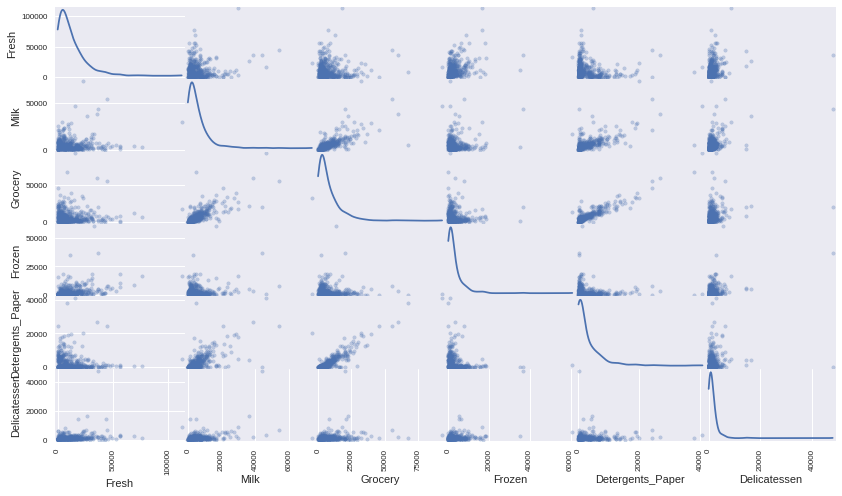

In [175]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Detergents and Grocery exhibit a heavy correlation with one another. Furthermore Milk has some minor correlation with both Grocery (and Detergents_Paper). These confirm the suspicions about the features that were 
considered unnecessary as Grocery and Detergents_Paper were shown to both be potentially predicted by another feature. The fact that they are closely correlated reflects that. Furthermore, Milk is shown to have a minimal 
correlation with these features, hence the slightly poisitve R^2 score. However, seeing the variance in the data it shows that the Milk feature is only minimally correlated if at all. 

The data for the correlation between Grocery and Detergents_Paper follow a postively skewed distribution with a large cluster of the points in small area with a few outliers. Milk offers a similar spread however, the number of outliers is 
higher as well as the data being clustered with greater variance (that is the data is spread over a larger area in 2 directions). Most of the datapoints for the Grocery/Detergents_Paper comparison seem to lie on a line that is 
correlated to the a function of the form $y = mx + b$.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

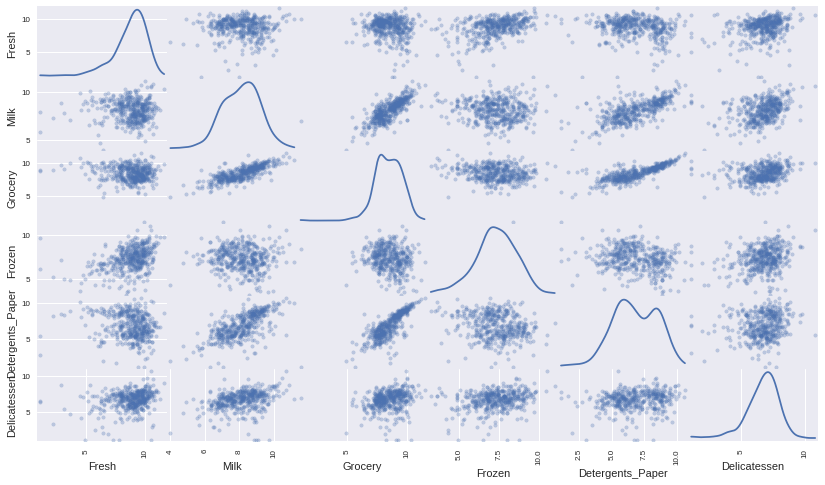

In [176]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [177]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.314553,7.590347,7.724005,6.052089,6.180017,5.978886
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [178]:
# For each feature find the data points with extreme high or low values
feature_outliers  = []
for feature in log_data.keys():
    #print feature
    #print "---------------"
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    #print "25th percentile: {0}".format(Q1)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    #print "75th percentile: {0}".format(Q3)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    #print "Step: {0}".format(step)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    current_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(current_outliers)
    feature_outliers.append(current_outliers.index.tolist())

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [179]:
from collections import Counter
# OPTIONAL: Select the indices for data points you wish to remove
# Prep for the simmr function
# Number of features the outlier needs to occur in to be removed
outlier_feature_threshold = 3
# Getting the outliers
def get_outliers(feat_outliers, threshold):
    cnt = Counter(np.hstack(feat_outliers))
    return [v for v in cnt.keys() if cnt[v] >= threshold]
outliers = get_outliers(feature_outliers, 2)
outliers_three_features = get_outliers(feature_outliers, 3)
print "The {0} outliers are: {1}".format(len(outliers), outliers)
print "Removing outliers..."
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "There are {0} datapoints remaining the dataset \
after the outliers have been removed".format(good_data.shape[0])
print "With a three feature threshold we have {0} as outliers \
which there is {1} of".format(outliers_three_features, len(outliers_three_features))

The 5 outliers are: [128, 154, 65, 66, 75]
Removing outliers...
There are 435 datapoints remaining the dataset after the outliers have been removed
With a three feature threshold we have [154] as outliers which there is 1 of


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes there are 5 data points that are outliers for more than one feature. Some of those datapoints are difficult to remove, due to their correlation between the Grocery and Detergents_Paper where there may be multiple outliers in common. The outliers that were chosen are ones that are outliers on at least 2 features which there are 5 of as previously mentioned. These outliers were removed as having outlier along more than one feature strongly indicates that the datapoint itself is an outlier rather than simply being an outlier in a single feature which may reflect characteristics of that feature. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Samples


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.640939,-2.154867,0.256839,-0.492444,0.107562,0.283178
1,5.331570,1.884453,-0.695693,-0.197159,-0.546050,-0.380207
2,2.189879,4.860452,0.000843,0.482714,-0.504090,0.198788


Explained variance for first two principle components: 0.706817230807
Explained variance for first four principle componets: 0.931090109951
Visualization of dimensions


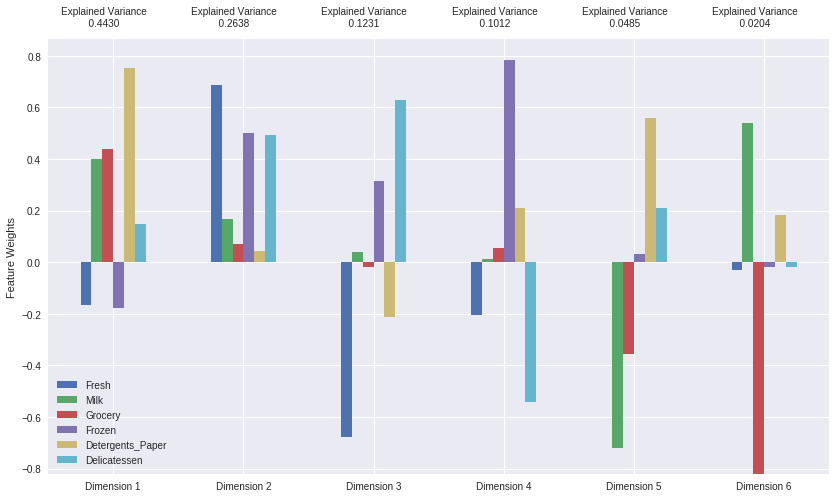

In [180]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print "Samples"
display(pd.DataFrame(pca_samples, columns=["Dimension {0}".format(i + 1) for i in range(pca.n_components_)]))

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
# Explained Variance
print "Explained variance for first two principle components: {0}".format(sum(pca.explained_variance_ratio_[:2]))
print "Explained variance for first four principle componets: {0}".format(sum(pca.explained_variance_ratio_[:4]))
print "Visualization of dimensions"

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first two principle components provide an explanation of $\frac{7068}{10000}$ of the data. The first four principle components explain $\frac{9310}{10000}$.

The first four components could be explained as:
1. Considering the scale of the eigencustomer, we have a representative establishment that is responsible for    representing nearly a half of the entire clientele. It could represent the general idea of a supermarket/general grocer, considering the there mahor features it weights are Grocery, Milk and Detergent_Paper. In fact this could represent the idea of a store in general. 
2. A farmer's market/fish market or resturaunt/food service location. Given the priority of Fresh, Frozen or Delicatessen we have circumstances whereby the establishment could also categorize the food service industry in general. 
3. Considering the large wieght on deli food as well as frozen goods and negative emphasis on basically everything else indicates an a deli or another similar service location. 
4. The major emphasis on frozen goods as well as some paper would seem to indicate a large B2B retail purchaser for a company that would sell to resturaunt chains or other larger enterprise efforts. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [181]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.6409,-2.1549,0.2568,-0.4924,0.1076,0.2832
1,5.3316,1.8845,-0.6957,-0.1972,-0.5461,-0.3802
2,2.1899,4.8605,0.0008,0.4827,-0.5041,0.1988


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Samples


,Dimension 1,Dimension 2
0,-0.640939,-2.154867
1,5.331570,1.884453
2,2.189879,4.860452


Visualization of dimensions


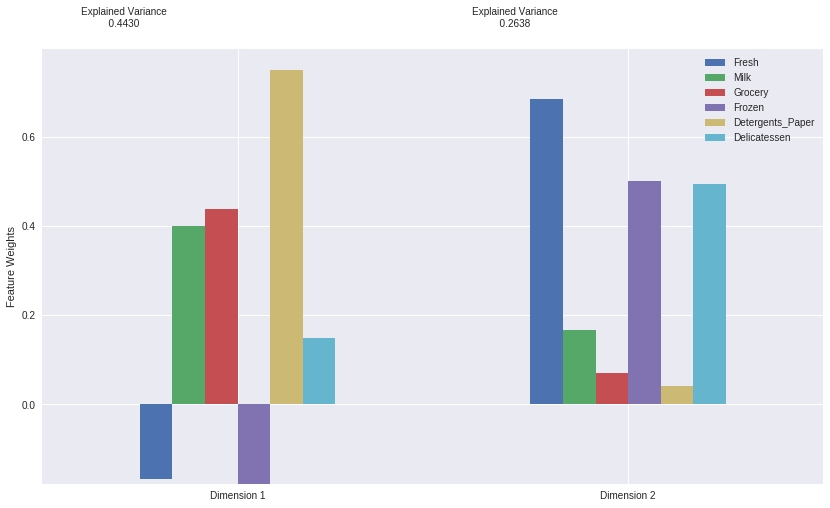

In [182]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Displaying transformed data
print "Samples"
display(pd.DataFrame(pca_samples, columns=["Dimension {0}".format(i + 1) for i in range(pca.n_components_)]))
print "Visualization of dimensions"
pca_results_two_features = vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [183]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.6409,-2.1549
1,5.3316,1.8845
2,2.1899,4.8605


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

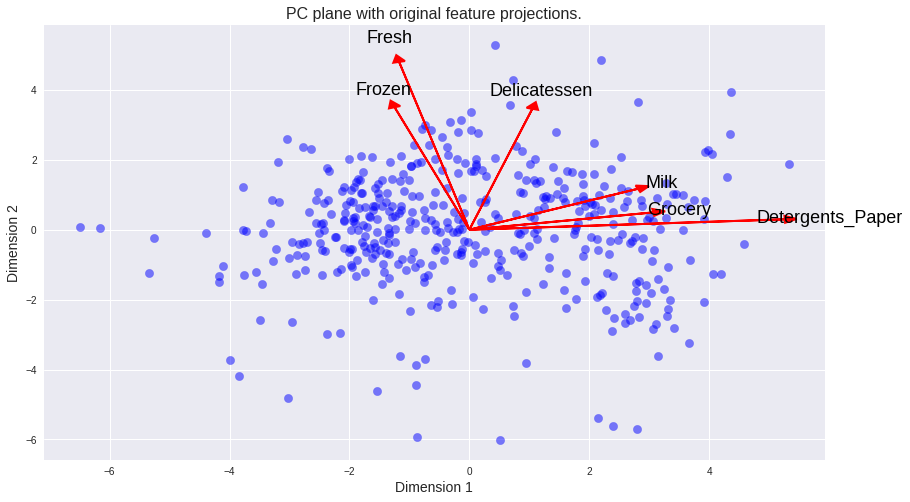

In [184]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-means clustering is useful in scenarios where there are well defined clusters. Due to k-means nature, calculations do not need to repeated for each point for every possible cluster and therefore the algorithm runs much more performantly than Gaussian Mixture Model.

Gaussian Mixture Model has the benefit of seeing the world in shades of grey. That is, points can belong to clusters to varying degrees of strength, which is useful when clusters are not well defined. However this means that datapoints can not be eliminated once clusters have been assigned and computation needs to be performed on every point for every cluster making the algorithm more inefficient but more flexible. Furthermore, it has the advantage of being able to non-circular, enlongated clusters whereas k-means cannot. 

Considering the homogenity of the data, k-means clustering would be too harsh. Gaussian Mixture Model's soft clustering approach lends it to the structure of the data. Furthermore, considering the small size of the dataset, the Gaussian Mixture Model will not be so computationally taxing as to not warrant pursuit. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [185]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
def GMM_Clusterer(num_clusters):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = num_clusters, random_state = 9001)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    #print "Given {0} clusters the silhouette score is {1}".format(num_clusters, score)
    return score

cluster_dict = {i: GMM_Clusterer(i) for i in range(2, 25)}
best_cluster_size = max(cluster_dict.iteritems(), key= operator.itemgetter(1))[0]
print "The maximum score is {0} with {1} clusters".format(cluster_dict[best_cluster_size], best_cluster_size)

The maximum score is 0.411818864386 with 2 clusters


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 clusters provides the best silhoutte score, with a score of 0.4118.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

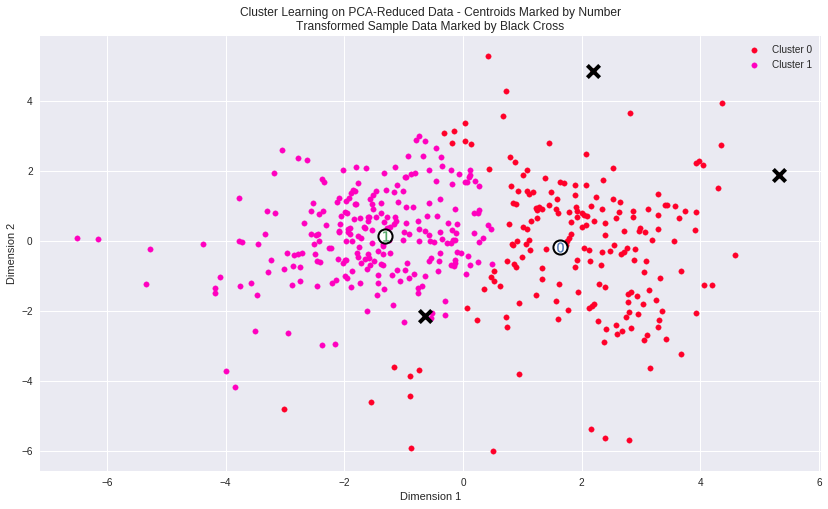

In [186]:
# Display the results of the clustering from implementation

clusterer = GMM(n_components = 2, random_state = 9001)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [187]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(pd.concat([true_centers, data.describe().ix[1:3,], data.describe().ix[4:7,]]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.000000,6347.000000,9555.000000,1036.000000,3046.000000,945.000000
Segment 1,8812.000000,2052.000000,2689.000000,2058.000000,337.000000,712.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
We begin with a notion of feature domination. That is, given any segement $S_j$ and feature $f_i$ that the feature value for a specific segment denoted $f_{ij}$ is maximized. That is a dominating $f_{ij} > f_{ik} \forall k \neq j$ given $S_j$ and $f_i$. Furthermore, $f_{i0.5} < f_{ij} < f_{i0.75}$ where the 0.5 and 0.75 refer to the first and third quartiles and $f_{i0.5}$ and $f_{i0.75}$ represent the values for that feature at those quartiles. 
As a secondary note, it should be considered that delicatessen for Segment 0 is greater than for Segment 1 but it does not dominate. This could be evidenced by the fact that many supermarkets have deli counters. 
* Segment 0 could be represented by a supermarket/retail food establishment. This is contributed by the factor that Segment 0 dominates the Milk, Grocery, and Detergents_Paper features. 
* Segment 1 could be represented by a farmer's market/fish market or food service establishment with its domination of fresh and frozen goods. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [188]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

display(pd.concat([samples, true_centers]))


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1502.0,1979.0,2262.0,425.0,483.0,395.0
1,16117.0,46197.0,92780.0,1026.0,40827.0,2944.0
2,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


**Answer:** 
<pre>
| Sample | Cluster |
|--------|---------|
|    0   |    1    |
|    1   |    0    |
|    2   |    0    |
</pre>

The first sample does not seem to strongly agree with the cluster it was given. As illustrated by the diagram resultant from the cluster visualization, it can be seen that the first sample point straddles the border between the two clusters quite closely. The initial assumption does not agree with the qualitative predicition made by GMM. This prediction is actually rather perplexing as the maximal features are grocery and milk rather than frozen or fresh which are the primarily weighted components of Segment 1, the cluster to which its assigned. Therefore, we can consider this predicted cluster asignment an outlier. 
of the resulting clusters. 

The second sample agrees with its predicted cluster. 

The third sample, however does not agree with its predicted cluster effectively. Due to the structure of the data, Segment 1 is assigned generally in cases where the collective values for features are high. For example, while the fresh feature has a value of 112151.0, the features: Milk, Grocery, Frozen, and maybe Detergents_Paper are exceptional values given the values generated by those features' measures of central tendency. That is, formally that the sample 3 could have been assigned Segment 0 due to its' extreme value for the fresh category. However, combined with the rest of the features, these additional values are sufficient to push the datapoint into Segment 1 by a small margin. The prediction is not consistent with the prediction but borders on the clustering boundary and depening on feature allocation and weighting can causes future analsys of this point inconsistent with the future clustering predictions. 


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Depending on the use and logistical arrangements of different customers, the customers will not all be affected equally different businesses or personal lifestyles affect the resulting permissable scheduling arrangements. Depending on the nature of what the wholesale distributor is selling, clustering the customers based on regularity and frequency of shipments can definitely help to predict which customers would be negatively affected by the scheduling changes.

However, this may not entirely represent the full picture as there may be customers who recieve frequent shipments who may not require it and there may be customers who order infrequently who would be affected by the limited service. This extra detail can be sussed out typically by establishing for what purpose products are being ordered. 

Consider a store orders stock daily during the week for nonperishable goods. This customer may actually benefit from less frequent shipments. Or via juxtaposition consider a customer who orders infrequently but orders immediately perishable goods (such as a resturaunt ordering an usual item for an infrequently sold and publicized special). Or a customer ordering a replacement computer for their business who may depend on the arrival of the computer in order to begin their work again. 

A/B testing is most useful when done on representative subsets of the actual customer-base. The existing customer segments we developed provide 'centers' of mass. There are two major possibilities in determining the customers to select for use in the A/B testing. The first would be to simply randomly sample equal numbers from each cluster. Secondly would be to apply clustering to the clusters themselves and see if there are any representative archetypes within the clusters. From these archetypes we could then sample with respect to the distribution and commonality of the archetypes.

Once these subset to be tested is determined we would then apply A/B testing that is, each of the cluster will be tested on the 3 day delivery to see the resultant reaction. This reaction depending on its overall confidence and proportion will be used to reference the general consensus of the entire cluster. By using the larger clusters and/or their implicit sub-archetypes we can establish wish customers generally will be most impacted by the change in the delivery service and their general reaction to it. 

**Alternate**
One possible way of going about this would be to sample a small subset of the customer-base and then give them surveys to extract features from. Once these features and response rates are established a Monte-Carlo simulation could be applied to help build a slightly larger sample and extract an analysis closer to a representative population. Once that is complete, clustering and ICA/PCA can be done on the data set of extract implicity information from it and to help define the affected customer base without having to query all the customers directly. 

Now this method does has faults, in that the expansion of the dataset may not be the best way to extrapolate extra data and simply using the probabilities and acceptance rate of the surveyed customers may be more directly assessed via other statistical methods. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Using clustering the old customer database could be analyzed to extract customer segments. Then a supervised model could be trained on the spending habits and customer segments to which a customer belongs. Once the supervised model is trained, then the projected spending habits could be fed into the supervised model to determine which customer segment/cluster the customer belongs to.

However, using only actual spending  in the training and then predicting spending in the customer segment prediciton may unintentionally lead to undesirable circumstances. It may be possible depending on business practices (if the business requests predictions each year/quarter) to incorporate that as well as the actual spending habits to help establish the customer segments and may result in a slightly better understanding of the customer base since less of the information would be hidden and half to be assumed by the model. During the training process it would also be possible to use techniques like cross-validation, boosting, hyper parameter tuning in order to optimize the performance of the model. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

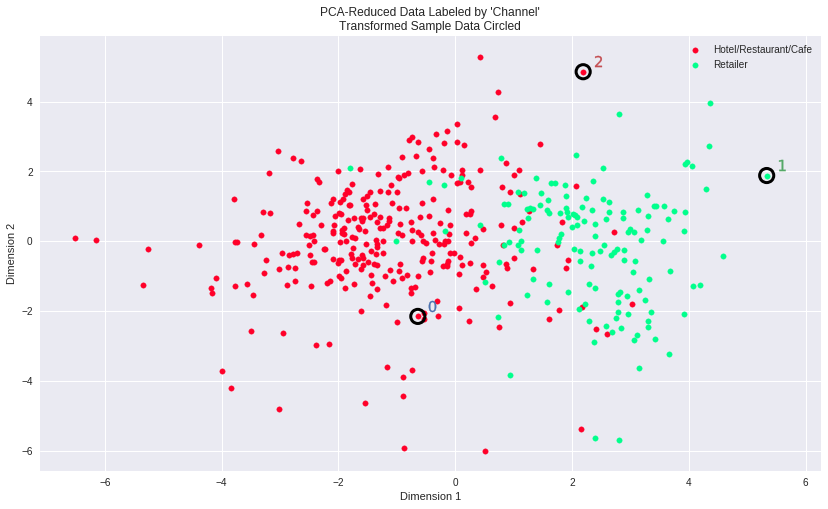

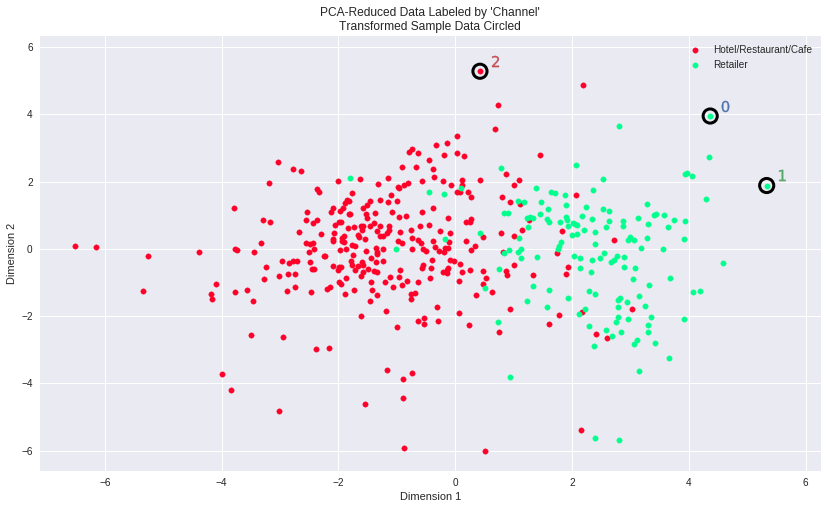

In [190]:
# Display the clustering results based on 'Channel' data with samples selected via maximal variance
vs.channel_results(reduced_data, outliers, pca_samples)
# Display the clustering results based on 'Channel' data with samples selected via Euclidean distance
pca_euclidean = PCA(n_components = 2)
pca_euclidean.fit(good_data)
pca_samples_euclidean = pca_euclidean.transform(np.log(samples_euclidean))
vs.channel_results(reduced_data, outliers, pca_samples_euclidean)
# As established visually by the data, euclidean distance per feature is a poor metric 

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** 

The number of clusters chosen via the Gaussian Mixture Model was 2, which is exactly the number of clusters represented by the underlying distribution. Considering the nature of the 'Channel' data, and that the clusters have a deeply interwoven border seem to indicate that PCA with two features may not be the best way to decisively split the data and there is possibly a better formulation to obtain a cleaner split. The clusters obtained by the GMM have a much clearer line of demarcation between the clusters. However, this could additionally be addressed with the choice of a different clustering algorithm potentially.

In [170]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
    
#def euclidean_dist(x,y):
    #return math.sqrt(sum([math.pow(x[i] - y[i], 2) for i in range(len(x))]))
#def printable_sample_max_dict(dictionary):
    #output = max(dictionary.iteritems(), key = operator.itemgetter(1))[0]
    #print dictionary[output]
    #return output
#longest_euclidean_distance = simmr(good_data, 2, 
                                   #lambda x: x.shape[0],
                                   #lambda x,y: x.ix[list(y)], 
                                   #lambda x: euclidean_dist(x.as_matrix().tolist()[0],x.as_matrix().tolist()[1]),
                                   #printable_sample_max_dict)
# The longest euclidean distance comes from the pair (47,333) with a Euclidean distance of 13.5480231547
def k_MiniBatchKMeans(k, data):
    cls_alg = MiniBatchKMeans(n_clusters=k, random_state=5)
    cls_alg.fit(data)
    preds = cls_alg.predict(data)
    score = silhouette_score(data, preds)
    return (preds, score)

def k_AffinityPropagation(k, data):
    cls_alg = AffinityPropagation(preference=k)
    cls_alg.fit(data)
    preds = cls_alg.predict(data)
    try: 
        score = silhouette_score(data, preds)
    except ValueError as e:
        score = 0
        #print e
    return (preds, score)

#estimate_bandwidth will give better results than manual estimation
#built-in function uses KNN
def k_MeanShift(data):
    cls_alg = MeanShift()
    cls_alg.fit(data)
    preds = cls_alg.predict(data)
    score = silhouette_score(data, preds)
    return (preds, score)

#Not using a specialized affinity calculation since the data has
#already been transformed via pca
def k_SpectralClustering(k, data):
    cls_alg = SpectralClustering(n_clusters=k, random_state=5)
    preds = cls_alg.fit_predict(data)
    score = silhouette_score(data, preds)
    return (preds, score)

def k_AgglomerativeClustering(k, data):
    cls_alg = AgglomerativeClustering(n_clusters=k)
    preds = cls_alg.fit_predict(data)
    score = silhouette_score(data, preds)
    return (preds, score)

def k_DBSCAN(k, data):
    cls_alg = DBSCAN(eps=k)
    preds = cls_alg.fit_predict(data)
    try:
        score = silhouette_score(data, preds)
    except ValueError as e:
        score = 0
    return (preds, score)

def k_Birch(k, data):
    cls_alg = Birch(n_clusters=k)
    cls_alg.fit(data)
    preds = cls_alg.predict(data)
    score = silhouette_score(data, preds)
    return (preds, score)

def k_kMeans(k, data):
    preds = k_means(data, n_clusters=k)[1]
    score = silhouette_score(data, preds)
    return (preds, score)

def best_clusterer(alg, rng=None):
    if rng != None:
        dictionary = {i: alg(i, reduced_data) for i in rng}
    else:
        dictionary = {0: alg(reduced_data)}
    scores_dictionary = {k: v[1] for k,v in dictionary.iteritems()}
    best = max(scores_dictionary.iteritems(), key = operator.itemgetter(1))[0]
    num_clusters = len(set(dictionary[best][0]))
    if best == 0 or dictionary[best][1] == 0:
        print "{0} could not effectively cluster the data".format(alg.__name__[2:])
    else:
        print "Best score for {0} is {1} clusters with score {2}".format(alg.__name__[2:],
                                                                         num_clusters, dictionary[best][1])

#Used for AffinityPropagation since it has no explicit management of clusters
def neg_rng_to_zero(neg, step):
    return [(neg + (float(abs(neg))/float(step)) * i) for i in range(0, step + 1)]
cluster_range = range(2,15)
best_clusterer(k_MiniBatchKMeans, cluster_range)
best_clusterer(k_AffinityPropagation, neg_rng_to_zero(-13.584, 12))
best_clusterer(k_MeanShift)
best_clusterer(k_SpectralClustering, cluster_range)
best_clusterer(k_AgglomerativeClustering, cluster_range)
best_clusterer(k_DBSCAN, np.arange(0.1, 13.584/2.0, 13))
best_clusterer(k_Birch, cluster_range)
best_clusterer(k_kMeans, cluster_range)

Best score for MiniBatchKMeans is 2 clusters with score 0.426072167684
Best score for AffinityPropagation is 61 clusters with score 0.395272628616
MeanShift could not effectively cluster the data
Best score for SpectralClustering is 3 clusters with score 0.252622238884
Best score for AgglomerativeClustering is 2 clusters with score 0.375068648335
DBSCAN could not effectively cluster the data
Best score for Birch is 6 clusters with score 0.329554825526
Best score for kMeans is 2 clusters with score 0.426281015469


Using several different algorithms and their resulting silhouette scores we find that K-means and MiniBatch K-means provide a slight lead in terms of their ability to cluster the data. However, considering how that the $\frac{0.426281015469 - 0.411818864386}{0.462681015469}$ which is roughly 3.4% inaccuracy which is a small enough margin of error to arise from the choice of the random_state variable. This implies that the result of the k-means, MiniBatch K-means and GMM are the best choices of clustering algorithms available according to silhouette scores. The other algorithms like AffinityPropagation and Birch may decent scores however, the number of clusters they use doesn't match the underlying distribution as it is now known and thus does not match the underlying reality as effectively. 

That being said the Segment 0 could easily refer to the Hotel/Resturaunt/Cafe channel whereas the Retailer channel can be solidly represented by the Segment 1. As addressed earlier, the demarcation between the actual channels is not as well defined as it is for the clustering. This could be addressed by using the a good similarity function or similarity-matrix for SpectralClustering or AgglomerativeClustering.

That is, the clusters while not perfect are solidly consistent with the underlying distribution. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  

**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.